In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Set the seaborn color palette
sns.set_palette("husl", 26)

In [28]:
def read_graph(file_name):
    f = open(file_name, 'r')
    lines = f.readlines()
    raw = {}
    local = {}
    n=int(len(lines)/3)
    for i in range(n):
        g = lines[3*i][:-1]
        raw[g] = list(map(lambda x: eval(x), lines[3*i+1].split(' ')))
        local[g] = list(map(lambda x: eval(x), lines[3*i+2].split(' ')))
    return raw,local
def draw_multi(file_name):
    f, ax = plt.subplots(2,13, figsize=(19,3.5))
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0.5, hspace=0.60)
    raw, local = read_graph(file_name)
    graphs = list(raw.keys())
    i = 0
    for g in graphs:
        if (max(local[g])<5):
            ax[i].xaxis.set_major_locator(MaxNLocator(3, integer=True))
        else:
            ax[i].xaxis.set_major_locator(MaxNLocator(5, integer=True))

        ax[i].yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax[i].scatter(local[g], raw[g], alpha=0.5)
        factor = sum(raw[g])/sum(local[g])
        ax[i].set_title("{} R={:.1f}".format(g, factor))
        ax[i].tick_params(axis='x', rotation=90)
        i+=1
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("# rounds with LS", fontsize=14, labelpad=10)
    plt.ylabel("# rounds without LS", fontsize=14, labelpad=15)
    plt.savefig("./subrounds.pdf", bbox_inches='tight')
    plt.show()
    

def draw_multi_w_slope(file_name):
    f, ax = plt.subplots(4, 7, figsize=(14, 9))
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0.5, hspace=0.60)
    raw, local = read_graph(file_name)
    graphs = list(raw.keys())
    i = 0
    for g in graphs:
        if max(local[g]) < 5:
            ax[i].xaxis.set_major_locator(MaxNLocator(3, integer=True))
        else:
            ax[i].xaxis.set_major_locator(MaxNLocator(5, integer=True))

        ax[i].yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax[i].scatter(local[g], raw[g], alpha=0.5)
        
        # Add line with slope=1
        max_value = max(max(local[g]), max(raw[g]))
        ax[i].plot([0, max_value], [0, max_value], color='blue', linestyle='--', linewidth=1)

        factor = sum(raw[g]) / sum(local[g])
        ax[i].set_title("{} R={:.1f}".format(g, factor))
        ax[i].tick_params(axis='x', rotation=45)
        i += 1
    for j in range(26, len(ax)):
        f.delaxes(ax[j])
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("# rounds with LS", fontsize=20, labelpad=10)
    plt.ylabel("# rounds without LS", fontsize=20, labelpad=15)
    plt.savefig("./subrounds.pdf", bbox_inches='tight')
    plt.show()

In [84]:
def draw_multi_w_slope_smaller(file_name):
    f, ax = plt.subplots(2, 4, figsize=(12, 6))
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0.5, hspace=0.60)
    raw, local = read_graph(file_name)
    graphs = list(raw.keys())
    i = 0
    for g in graphs:
        max_x_value = max(local[g])
        if max(local[g]) < 5:
            ax[i].xaxis.set_major_locator(MaxNLocator(3, integer=True))
        else:
            ax[i].xaxis.set_major_locator(MaxNLocator(5, integer=True))

        ax[i].yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax[i].scatter(local[g], raw[g], alpha=0.5)
        
        # Add line with slope=1
        max_value = max(max(local[g]), max(raw[g]))
        ax[i].plot([0, max_value], [0, max_value], color='blue', linestyle='--', linewidth=1)
        ax[i].set_xlim(0, max_x_value * 1.2)
        factor = sum(raw[g]) / sum(local[g])
        ax[i].set_title("{} R={:.1f}".format(g, factor), fontsize=20)
        if i ==2:
            ax[i].tick_params(axis='x', rotation=0, labelsize=20)
            # set specific x ticks labels
            ax[i].set_xticks([40, 80])
        if i ==6:
            ax[i].tick_params(axis='x', rotation=0, labelsize=20)
            # set specific x ticks labels
            ax[i].set_xticks([60, 120])
        if i ==7:
            ax[i].tick_params(axis='x', rotation=0, labelsize=20)
            # set specific x ticks labels
            ax[i].set_xticks([400, 1200])
        else:
            ax[i].tick_params(axis='x', rotation=0, labelsize=20)
        if i == 7:
            ax[i].tick_params(axis='y', labelsize=16)  # set y ticks font size
        else:
            ax[i].tick_params(axis='y', labelsize=20)  # set y ticks font size
        # set x ticks font size
        i += 1
    for j in range(26, len(ax)):
        f.delaxes(ax[j])
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("# subround with VGC", fontsize=27, labelpad=10)
    # plt.ylabel("# subround without VGC", fontsize=27, labelpad=15)
    plt.ylabel("# subround without VGC", fontsize=27, labelpad=20, position=(-0.4, 0.5))
    plt.savefig("./subrounds_select.pdf", bbox_inches='tight')
    plt.show()

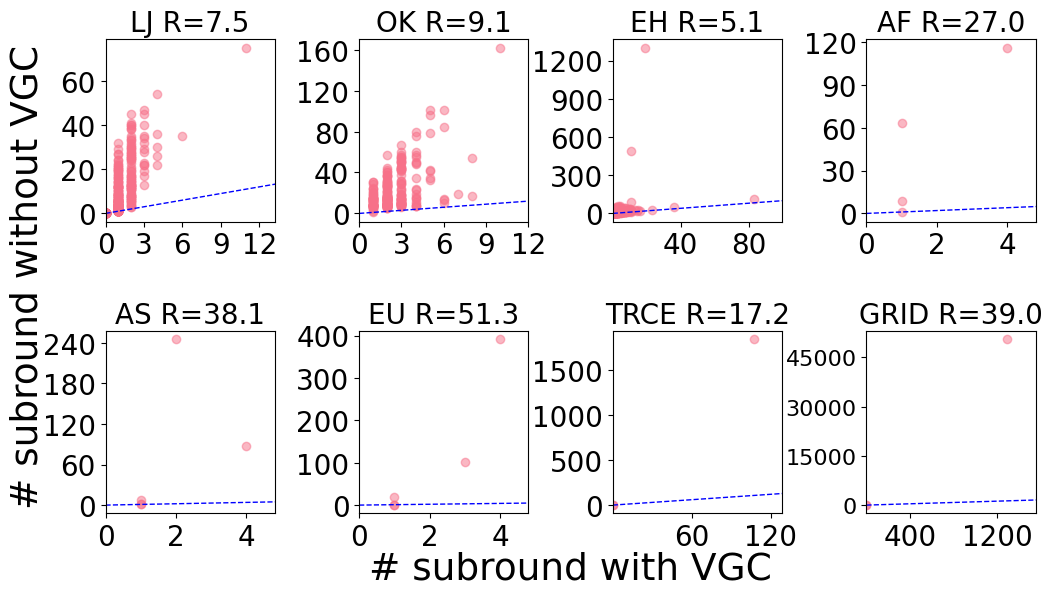

In [89]:
draw_multi_w_slope_smaller("./../../tables/reduce_select.txt")


In [86]:

def draw_multi_oneColumn(file_name):
    f, ax = plt.subplots(4,7, figsize=(12,12))
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0.5, hspace=0.60)
    raw, local = read_graph(file_name)
    graphs = list(raw.keys())
    # for g in ["HL14", "GL5","GL15", "HH5","REC", "REC'"]:
    #         graphs.remove(g)
    i = 0
    graphs = graphs[:26]
    for g in graphs:
        if (max(local[g])<5):
            ax[i].xaxis.set_major_locator(MaxNLocator(3, integer=True))
        else:
            ax[i].xaxis.set_major_locator(MaxNLocator(5, integer=True))

        ax[i].tick_params(axis = 'y', pad = 0.1)
        ax[i].yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax[i].scatter(local[g], raw[g], alpha=0.2, color = 'black')
        factor = sum(raw[g])/sum(local[g])
        ax[i].set_title("{} avg={:.0f}".format(g, factor), fontsize=14)
        ax[i].tick_params(axis='x', rotation=90)
        i+=1
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("# rounds with VGC", fontsize=14, labelpad=10)
    plt.ylabel("# rounds without VGC", fontsize=14, labelpad=15)
    plt.savefig("subrounds_oneColumn.pdf", bbox_inches='tight')
    plt.show()

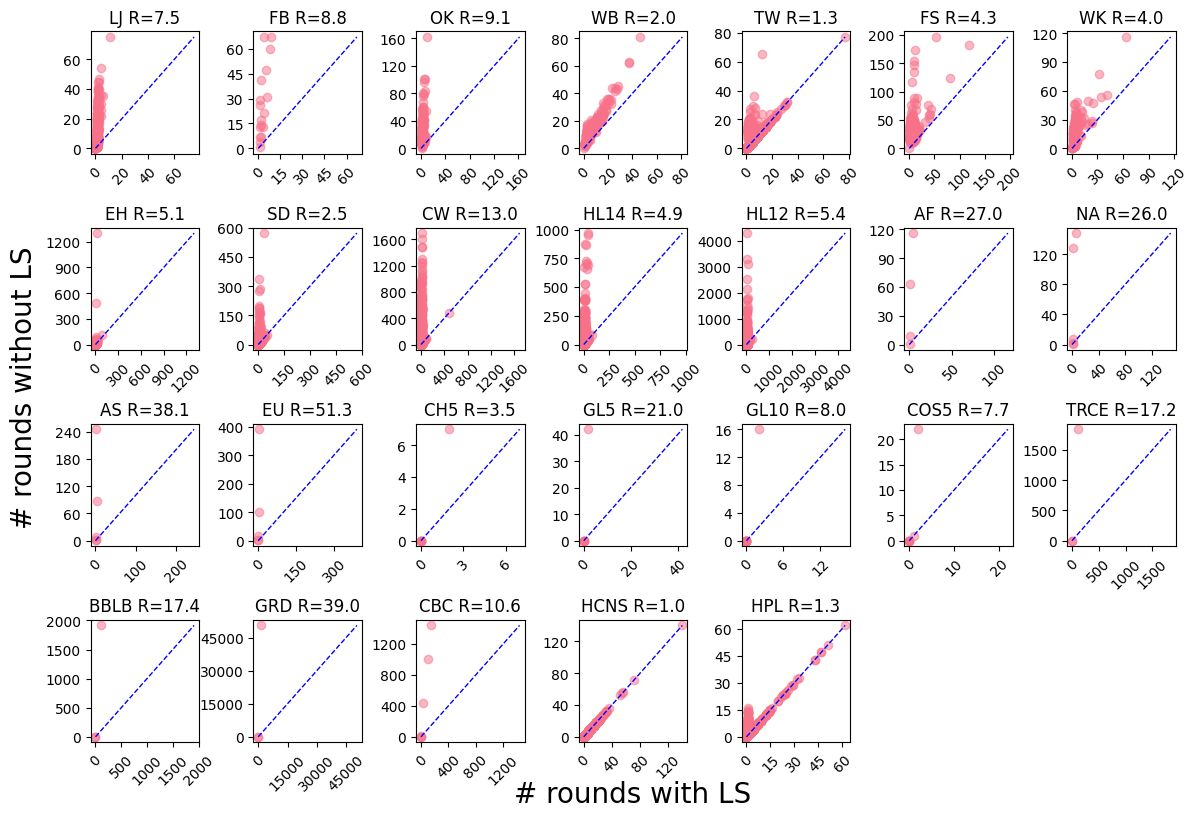

In [87]:
draw_multi_w_slope("./../../tables/reduce.txt")


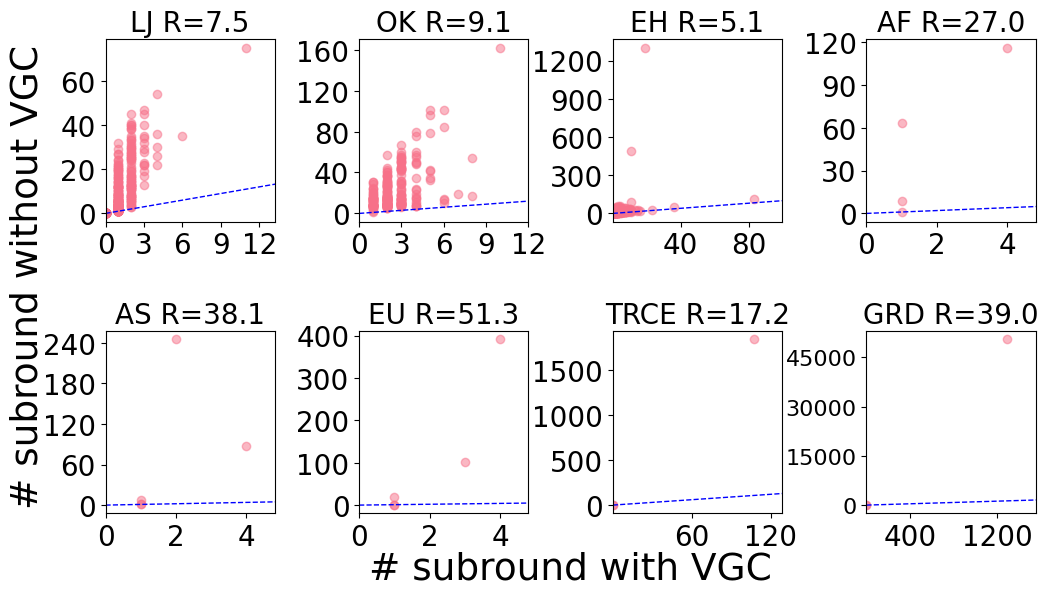

In [88]:
draw_multi_w_slope_smaller("./../data/reduce_select.txt")


In [34]:
def draw_multi(file_name):
    f, ax = plt.subplots(1,8, figsize=(16,1.7))
    ax = ax.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=0.5, hspace=0.60)
    raw, local = read_graph(file_name)
    graphs = ["TW","SD","HL12","COS5","GL2","GL20","SQR","SQR'"]
    i = 0
    for g in graphs:
        if (max(local[g])<5):
            ax[i].xaxis.set_major_locator(MaxNLocator(3, integer=True))
        else:
            ax[i].xaxis.set_major_locator(MaxNLocator(5, integer=True))

        ax[i].yaxis.set_major_locator(MaxNLocator(5, integer=True))
        ax[i].scatter(local[g], raw[g], alpha=0.5)
        factor = sum(raw[g])/sum(local[g])
        ax[i].set_title("{} avg={:.0f}".format(g, factor))
        ax[i].tick_params(axis='x', rotation=90)
        i+=1
    f.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel("# rounds with VGC", fontsize=14, labelpad=10)
    plt.ylabel("# rounds without VGC", fontsize=14, labelpad=8)
    plt.savefig("subrounds_onerow.pdf", bbox_inches='tight')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'reduce.txt'

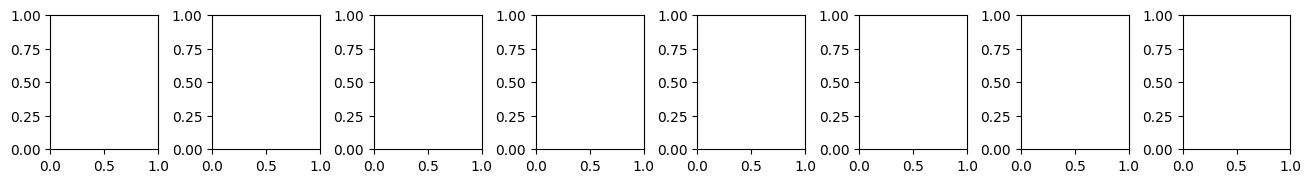

In [35]:
draw_multi("reduce.txt")